In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings('ignore')

In [149]:
path = 'FuelConsumptionCo2.xlsx'
df_fuel =  pd.read_excel(path)
df_fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


### Determinamos las variables independientes y la variable dependiente CO2 Emissions

<Axes: >

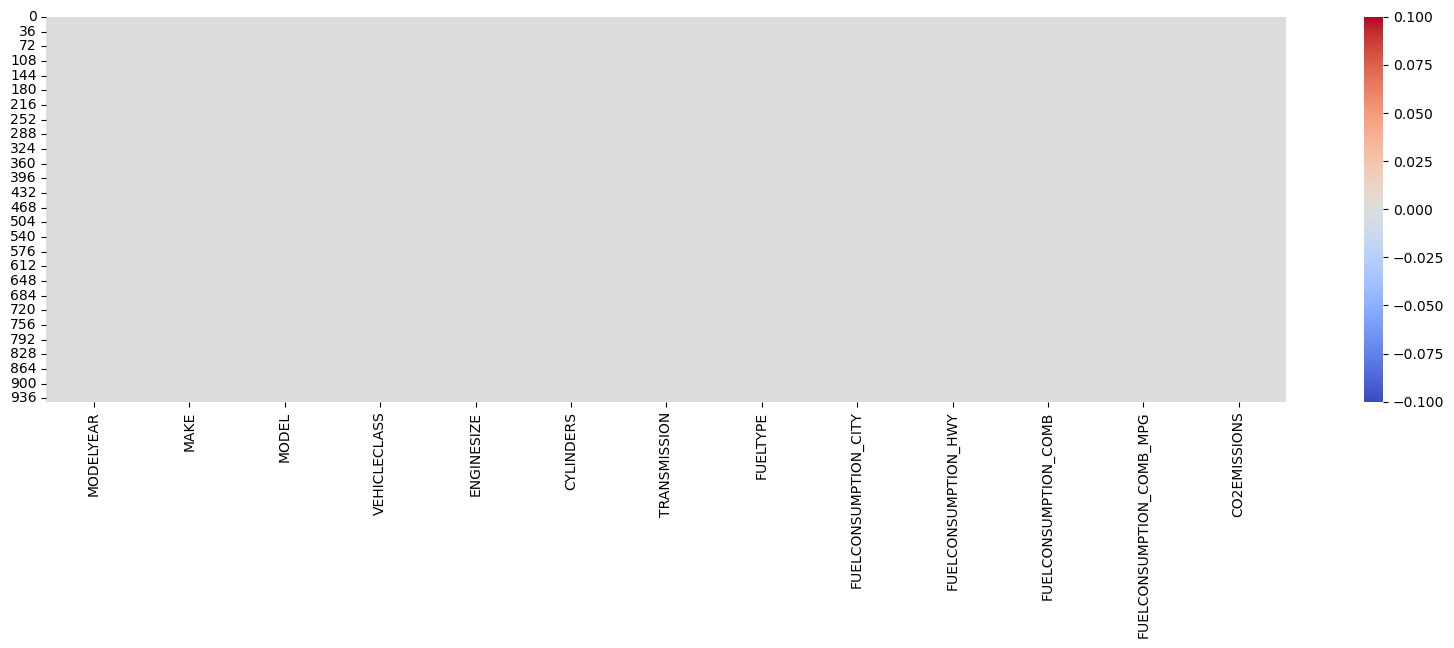

In [150]:
plt.figure(figsize=(20,5))
sns.heatmap(df_fuel.isnull(), cmap= 'coolwarm')

### Se revisa que no haya valores nulos y efectivamente no hay.

In [151]:
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 945 non-null    int64  
 1   MAKE                      945 non-null    object 
 2   MODEL                     945 non-null    object 
 3   VEHICLECLASS              945 non-null    object 
 4   ENGINESIZE                945 non-null    float64
 5   CYLINDERS                 945 non-null    int64  
 6   TRANSMISSION              945 non-null    object 
 7   FUELTYPE                  945 non-null    object 
 8   FUELCONSUMPTION_CITY      945 non-null    float64
 9   FUELCONSUMPTION_HWY       945 non-null    float64
 10  FUELCONSUMPTION_COMB      945 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  945 non-null    int64  
 12  CO2EMISSIONS              945 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 96.1+ KB


### Se revisa si tiene duplicados y si hay cambios en los datos.

In [152]:
df_fuel.drop_duplicates()
df_fuel['FUELTYPE'].value_counts()

FUELTYPE
Z    457
X    446
D     28
E     14
Name: count, dtype: int64

In [153]:
fuel_dicc= {'Z':1, 'X':2,'D':3, 'E':4}
df_fuel['FUELTYPENUM'] = df_fuel['FUELTYPE'].map(fuel_dicc)
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 945 non-null    int64  
 1   MAKE                      945 non-null    object 
 2   MODEL                     945 non-null    object 
 3   VEHICLECLASS              945 non-null    object 
 4   ENGINESIZE                945 non-null    float64
 5   CYLINDERS                 945 non-null    int64  
 6   TRANSMISSION              945 non-null    object 
 7   FUELTYPE                  945 non-null    object 
 8   FUELCONSUMPTION_CITY      945 non-null    float64
 9   FUELCONSUMPTION_HWY       945 non-null    float64
 10  FUELCONSUMPTION_COMB      945 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  945 non-null    int64  
 12  CO2EMISSIONS              945 non-null    int64  
 13  FUELTYPENUM               945 non-null    int64  
dtypes: float64

### Aqui considero que fueltype es importante, por ello lo convierto a numeros enteros para que se puedan considerar en el machine learning.

In [154]:
df_fuel_clean = df_fuel.drop(['MAKE','MODEL','VEHICLECLASS','TRANSMISSION', 'FUELTYPE', 'MODELYEAR'], axis=1)
df_fuel_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENGINESIZE                945 non-null    float64
 1   CYLINDERS                 945 non-null    int64  
 2   FUELCONSUMPTION_CITY      945 non-null    float64
 3   FUELCONSUMPTION_HWY       945 non-null    float64
 4   FUELCONSUMPTION_COMB      945 non-null    float64
 5   FUELCONSUMPTION_COMB_MPG  945 non-null    int64  
 6   CO2EMISSIONS              945 non-null    int64  
 7   FUELTYPENUM               945 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 59.2 KB


# LinearRegression

### Importamos la regression lineal para la regresion multiple.

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df_fuel_independiente= df_fuel_clean.drop(['CO2EMISSIONS'], axis=1)
df_fuel_dependiente= df_fuel_clean['CO2EMISSIONS']
df_fuel_dependiente.info()

<class 'pandas.core.series.Series'>
RangeIndex: 945 entries, 0 to 944
Series name: CO2EMISSIONS
Non-Null Count  Dtype
--------------  -----
945 non-null    int64
dtypes: int64(1)
memory usage: 7.5 KB


In [156]:
df_fuel_independiente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENGINESIZE                945 non-null    float64
 1   CYLINDERS                 945 non-null    int64  
 2   FUELCONSUMPTION_CITY      945 non-null    float64
 3   FUELCONSUMPTION_HWY       945 non-null    float64
 4   FUELCONSUMPTION_COMB      945 non-null    float64
 5   FUELCONSUMPTION_COMB_MPG  945 non-null    int64  
 6   FUELTYPENUM               945 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 51.8 KB


In [157]:
x_train, x_test, y_train, y_test = train_test_split(df_fuel_independiente, df_fuel_dependiente, test_size=0.2, random_state=1)
RegLin= LinearRegression()
RegLin.fit(x_train,y_train)

LinearRegression()

In [166]:
y_pred=RegLin.predict(x_test)

ErrorMedio = mean_squared_error(y_test, y_pred)
R2RL = r2_score(y_test, y_pred)
ErrorAbsoluto = mean_absolute_error(y_test, y_pred)

print(f"Intercepto: {RegLin.intercept_}")
print("")
print(f"Coeficientes: {RegLin.coef_}")

print("")

print(f"Mean Absolute Error (MAE): {ErrorAbsoluto}")
print(f"Mean Squared Error (MSE): {ErrorMedio}")
print(f"R-squared (R2): {R2RL}")


Intercepto: 117.36587079325204

Coeficientes: [ 1.64950847  4.23937314 -7.33586251 -2.3758074  25.26100574 -1.53141409
 -7.71986515]

Mean Absolute Error (MAE): 5.797811809231274
Mean Squared Error (MSE): 79.42595096464964
R-squared (R2): 0.9819779680359987


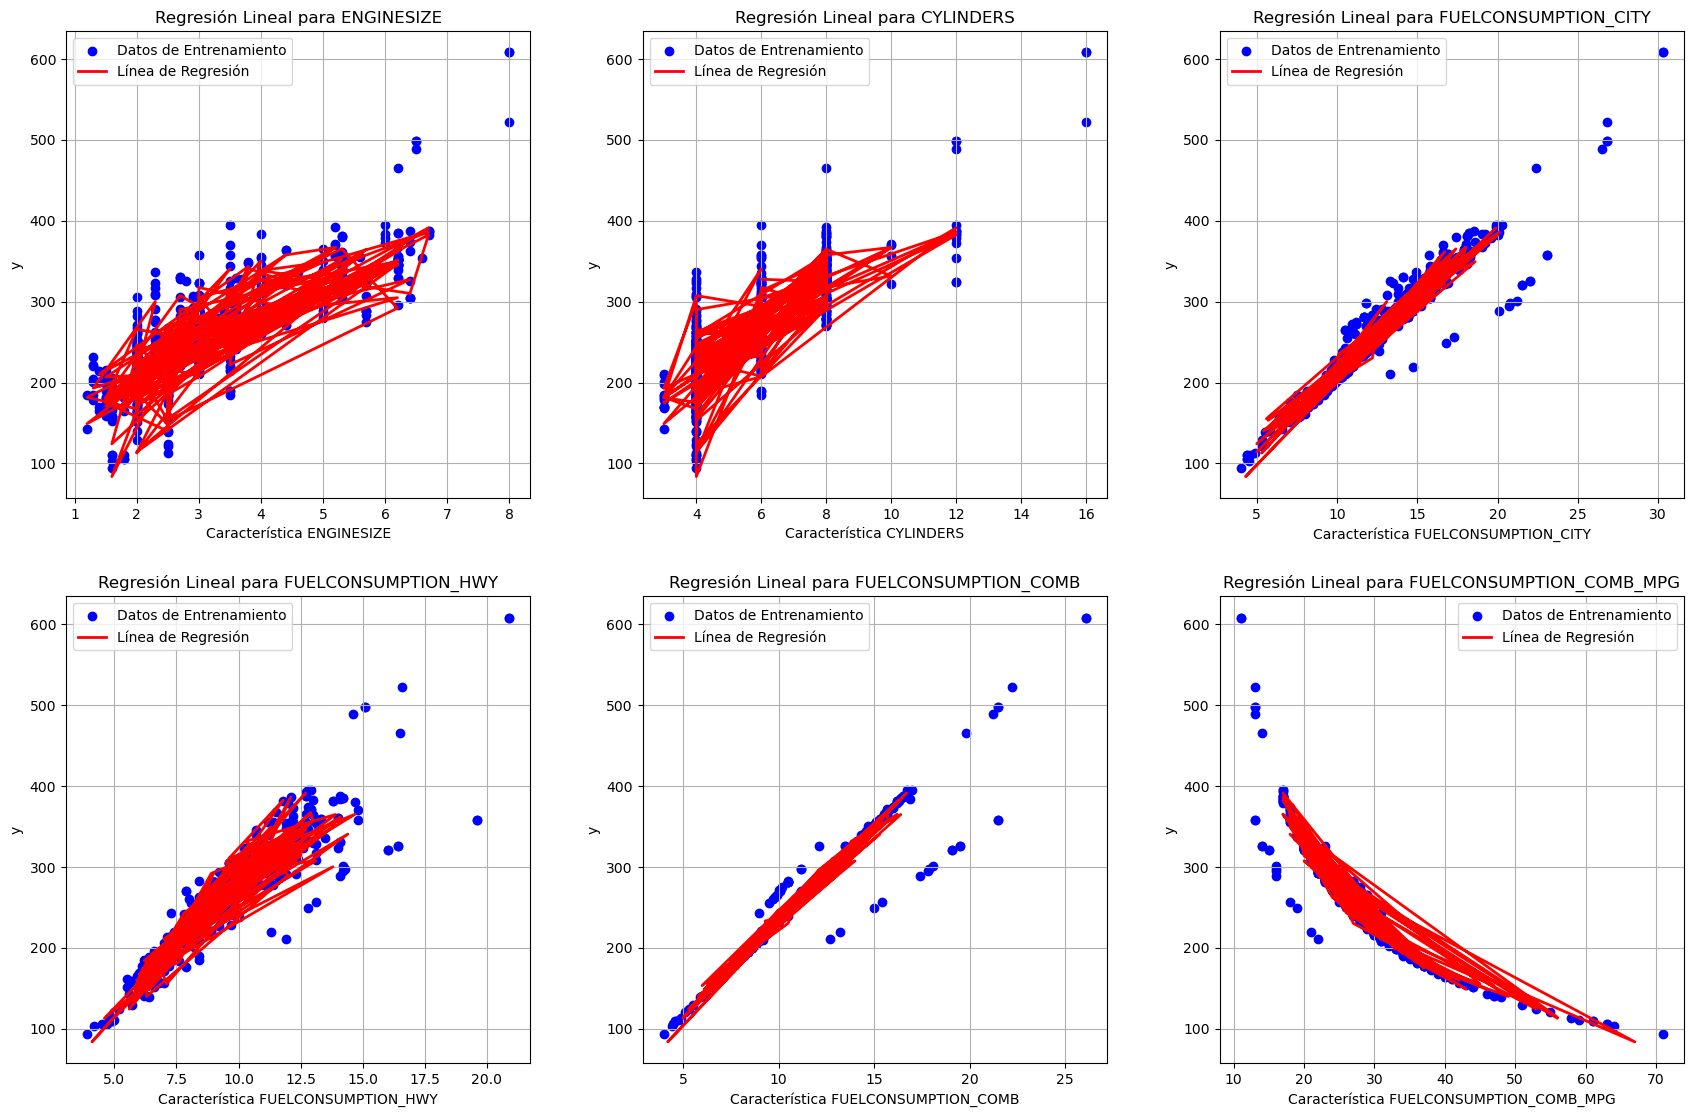

In [161]:
caracteristicas = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 
                   'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 
                   'FUELCONSUMPTION_COMB_MPG']

# Crear una figura y una rejilla de subplots de 2 filas y 3 columnas
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Asegurarnos de que la figura y los subplots se ajusten bien
fig.tight_layout(pad=5.0)

#Iterar sobre las características y los ejes de subplots
#Ejemplo Práctico 

#Para ayudar a visualizarlo, aquí tienes un ejemplo con i de 0 a 5:
    
    #Para i = 0: row = 0 // 3 = 0, col = 0 % 3 = 0
    
    #Para i = 1: row = 1 // 3 = 0, col = 1 % 3 = 1
    
    #Para i = 2: row = 2 // 3 = 0, col = 2 % 3 = 2
    
    #Para i = 3: row = 3 // 3 = 1, col = 3 % 3 = 0
    
    #Para i = 4: row = 4 // 3 = 1, col = 4 % 3 = 1
    
    #Para i = 5: row = 5 // 3 = 1, col = 5 % 3 = 2

    #Esto asegura que las características se asignen a los subplots en una rejilla de 2 filas y 3 columnas.

for i, caracteristica in enumerate(caracteristicas):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(x_train[caracteristica], y_train, color='blue', label='Datos de Entrenamiento')
    axs[row, col].plot(x_test[caracteristica], y_pred, color='red', linewidth=2, label='Línea de Regresión')
    axs[row, col].set_xlabel(f'Característica {caracteristica}')
    axs[row, col].set_ylabel('y')
    axs[row, col].set_title(f'Regresión Lineal para {caracteristica}')
    axs[row, col].legend()
    axs[row, col].grid(True)

# Mostrar la figura con todos los subplots
plt.show()

### Este es un experimento que hice para ver como se veia la regresion, a pesar de que el consumo tiene outliers, laregresion se enfoca completemante donde hay mas datos.

# Ridge

In [192]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-6, 6, 13)  # Genera 13 valores desde 10^-6 hasta 10^6

RidgeRegCV = RidgeCV(alphas=alphas, cv=15)  # Validación cruzada con 5 pliegues
RidgeRegCV.fit(x_train, y_train)

# El alpha óptimo
alpha_optimo = RidgeRegCV.alpha_
print(f"Alpha óptimo: {alpha_optimo}")

Alpha óptimo: 100.0


In [193]:
y_pred_ridge = RidgeRegCV.predict(x_test)

ErrorAbsolutoRidgeCV = mean_absolute_error(y_test, y_pred_ridge)
ErrorMedioRidgeCV = mean_squared_error(y_test, y_pred_ridge)
R2RidgeCV = r2_score(y_test, y_pred_ridge)

print(f"Intercepto: {RidgeRegCV.intercept_}")
print("")
print(f"Coeficientes: {RidgeRegCV.coef_}")

print("")

print(f"Mean Absolute Error (MAE): {ErrorAbsolutoRidgeCV}")
print(f"Mean Squared Error (MSE): {ErrorMedioRidgeCV}")
print(f"R-squared (R2): {R2RidgeCV}")



Intercepto: 125.40262507366481

Coeficientes: [ 1.69034603  4.08851764  4.20051294  5.57977718  5.0128817  -1.72134749
 -5.38069812]

Mean Absolute Error (MAE): 5.768395428049516
Mean Squared Error (MSE): 72.50795142048509
R-squared (R2): 0.9835476868419765


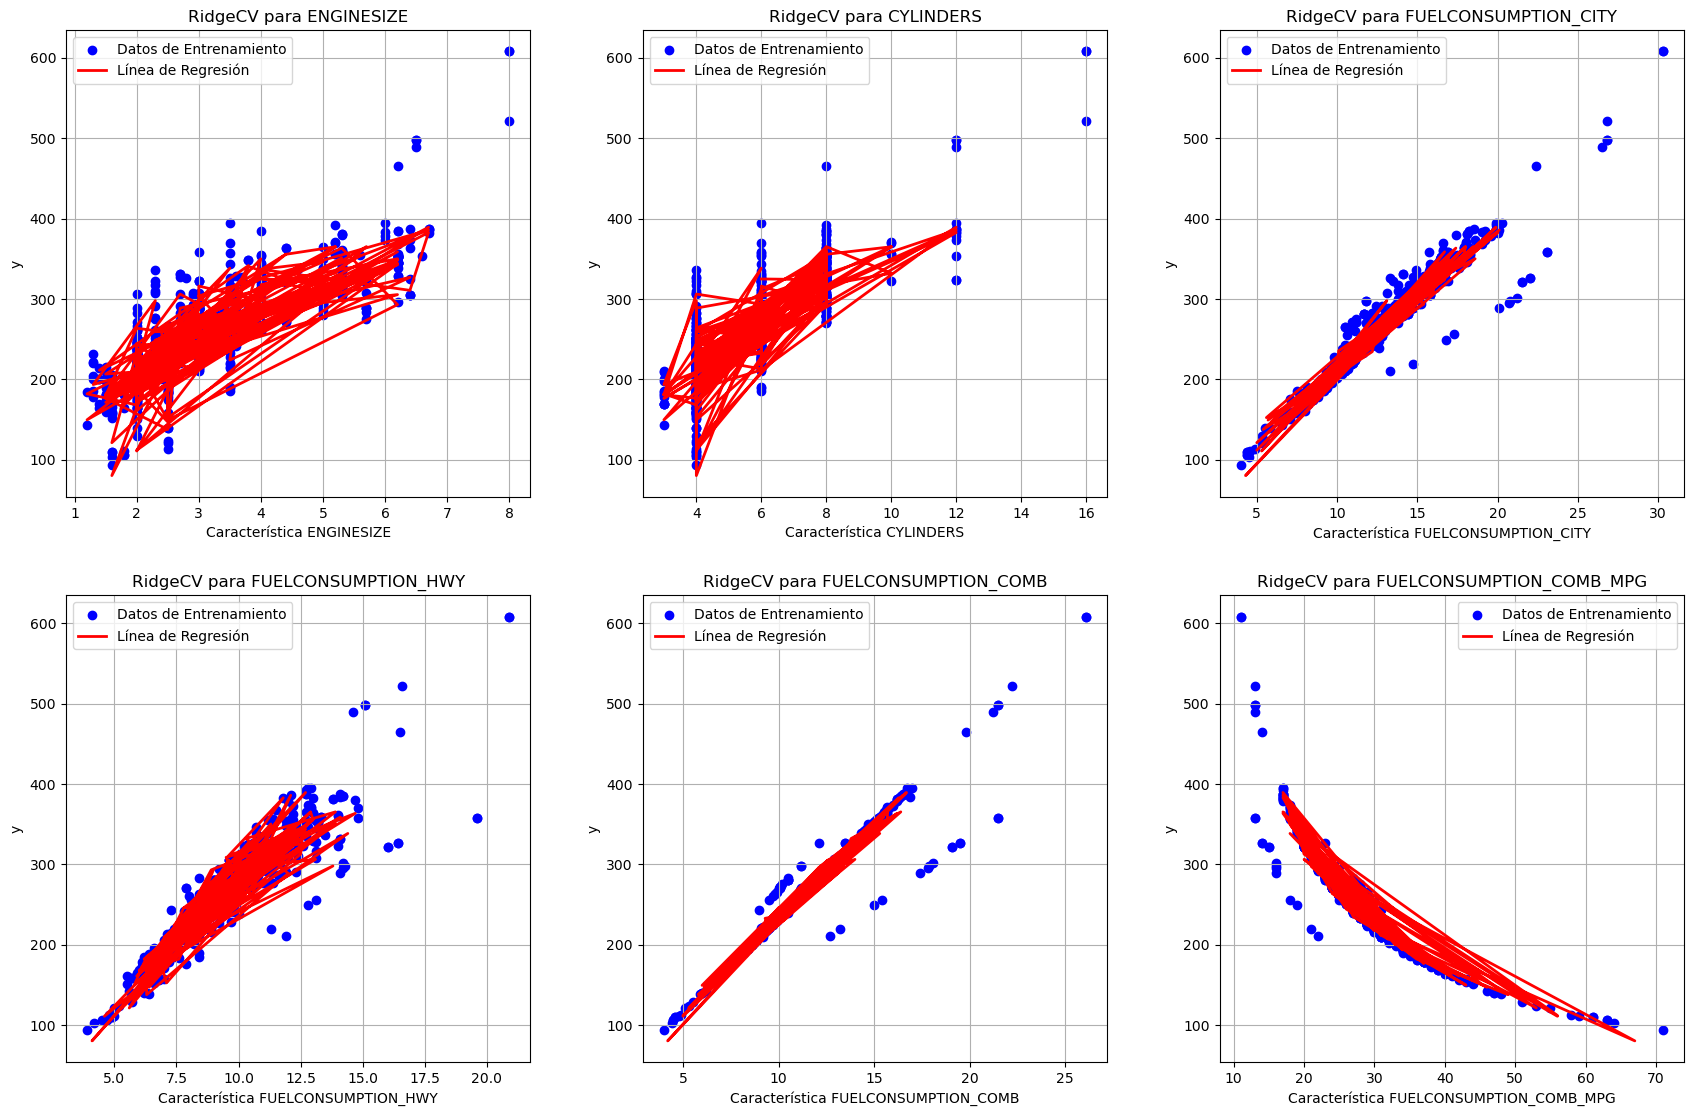

In [189]:
caracteristicas = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 
                   'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 
                   'FUELCONSUMPTION_COMB_MPG']

# Crear una figura y una rejilla de subplots de 2 filas y 3 columnas
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Asegurarnos de que la figura y los subplots se ajusten bien
fig.tight_layout(pad=5.0)

#Iterar sobre las características y los ejes de subplots
#Ejemplo Práctico 

#Para ayudar a visualizarlo, aquí tienes un ejemplo con i de 0 a 5:
    
    #Para i = 0: row = 0 // 3 = 0, col = 0 % 3 = 0
    
    #Para i = 1: row = 1 // 3 = 0, col = 1 % 3 = 1
    
    #Para i = 2: row = 2 // 3 = 0, col = 2 % 3 = 2
    
    #Para i = 3: row = 3 // 3 = 1, col = 3 % 3 = 0
    
    #Para i = 4: row = 4 // 3 = 1, col = 4 % 3 = 1
    
    #Para i = 5: row = 5 // 3 = 1, col = 5 % 3 = 2

    #Esto asegura que las características se asignen a los subplots en una rejilla de 2 filas y 3 columnas.

for i, caracteristica in enumerate(caracteristicas):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(x_train[caracteristica], y_train, color='blue', label='Datos de Entrenamiento')
    axs[row, col].plot(x_test[caracteristica], y_pred_ridge, color='red', linewidth=2, label='Línea de Regresión')
    axs[row, col].set_xlabel(f'Característica {caracteristica}')
    axs[row, col].set_ylabel('y')
    axs[row, col].set_title(f'RidgeCV para {caracteristica}')
    axs[row, col].legend()
    axs[row, col].grid(True)

# Mostrar la figura con todos los subplots
plt.show()

# Lasso

In [190]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-6, 6, 13)  # Genera 13 valores desde 10^-6 hasta 10^6

LassoRegCV = LassoCV(alphas=alphas, cv=15)  # Validación cruzada con 5 pliegues
LassoRegCV.fit(x_train, y_train)

# El alpha óptimo
alpha_optimo = LassoRegCV.alpha_
print(f"Alpha óptimo: {alpha_optimo}")

Alpha óptimo: 1e-05


In [191]:
y_pred_lasso = LassoRegCV.predict(x_test)

ErrorAbsolutoLassoCV = mean_absolute_error(y_test, y_pred_lasso)
ErrorMedioLassoCV = mean_squared_error(y_test, y_pred_lasso)
R2LassoCV = r2_score(y_test, y_pred_lasso)

print(f"Intercepto: {LassoRegCV.intercept_}")
print("")
print(f"Coeficientes: {LassoRegCV.coef_}")

print("")

print(f"Mean Absolute Error (MAE): {ErrorAbsolutoLassoCV}")
print(f"Mean Squared Error (MSE): {ErrorMedioLassoCV}")
print(f"R-squared (R2): {R2LassoCV}")

Intercepto: 116.01140542602371

Coeficientes: [ 1.54209608  4.22647057  6.28619655  8.72641609  0.6296444  -1.51459154
 -7.58394078]

Mean Absolute Error (MAE): 5.743721066608514
Mean Squared Error (MSE): 77.78299480530751
R-squared (R2): 0.982350760656792


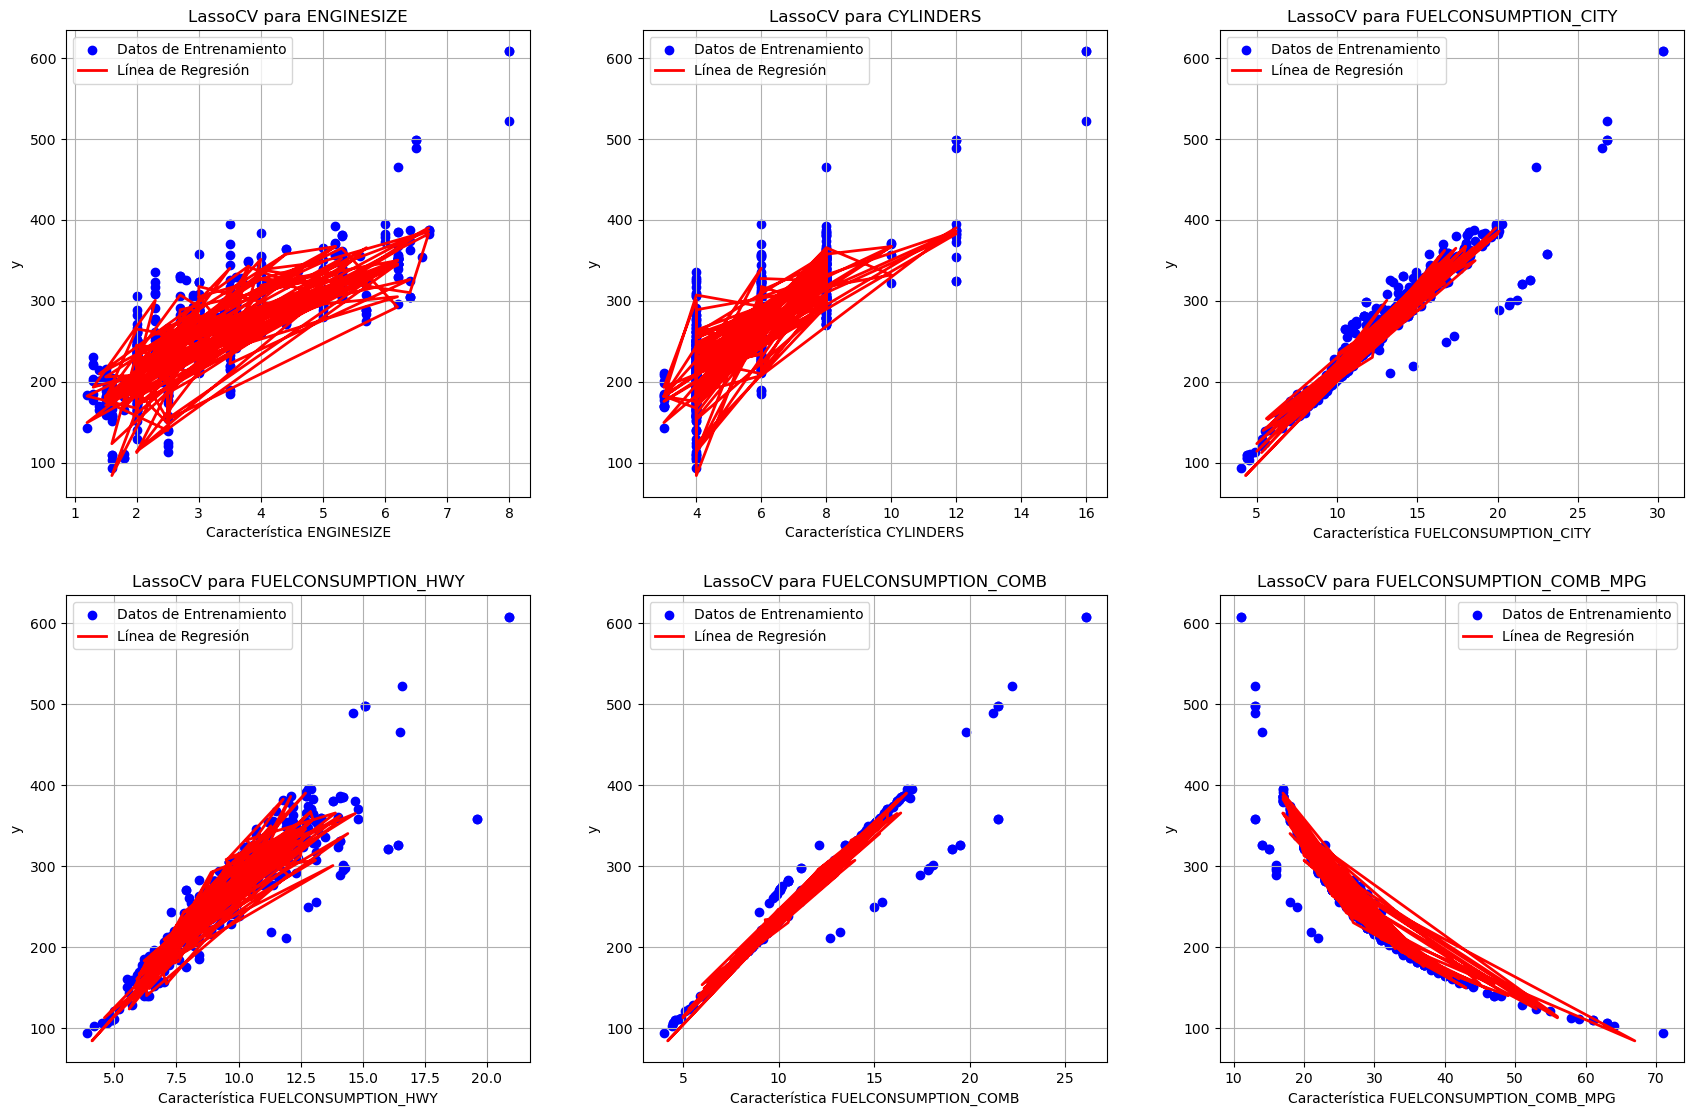

In [188]:
caracteristicas = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 
                   'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 
                   'FUELCONSUMPTION_COMB_MPG']

# Crear una figura y una rejilla de subplots de 2 filas y 3 columnas
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Asegurarnos de que la figura y los subplots se ajusten bien
fig.tight_layout(pad=5.0)

#Iterar sobre las características y los ejes de subplots
#Ejemplo Práctico 

#Para ayudar a visualizarlo, aquí tienes un ejemplo con i de 0 a 5:
    
    #Para i = 0: row = 0 // 3 = 0, col = 0 % 3 = 0
    
    #Para i = 1: row = 1 // 3 = 0, col = 1 % 3 = 1
    
    #Para i = 2: row = 2 // 3 = 0, col = 2 % 3 = 2
    
    #Para i = 3: row = 3 // 3 = 1, col = 3 % 3 = 0
    
    #Para i = 4: row = 4 // 3 = 1, col = 4 % 3 = 1
    
    #Para i = 5: row = 5 // 3 = 1, col = 5 % 3 = 2

    #Esto asegura que las características se asignen a los subplots en una rejilla de 2 filas y 3 columnas.

for i, caracteristica in enumerate(caracteristicas):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(x_train[caracteristica], y_train, color='blue', label='Datos de Entrenamiento')
    axs[row, col].plot(x_test[caracteristica], y_pred_lasso, color='red', linewidth=2, label='Línea de Regresión')
    axs[row, col].set_xlabel(f'Característica {caracteristica}')
    axs[row, col].set_ylabel('y')
    axs[row, col].set_title(f'LassoCV para {caracteristica}')
    axs[row, col].legend()
    axs[row, col].grid(True)

# Mostrar la figura con todos los subplots
plt.show()

In [195]:
r2_values = [R2RL,  R2RidgeCV, R2LassoCV]
Respuesta = {R2RL: 'Regresion Lineal',  R2RidgeCV: 'RidgeCV', R2LassoCV: 'LassoCV'}

Diferencia1 = [abs(1 - r2) for r2 in r2_values]

MejorIndex = Diferencia1.index(min(Diferencia1))
r2cercano = r2_values[MejorIndex]
MejorRegresion = Respuesta[r2cercano]

print(f"El valor de R² más cercano a 1 es el de la regression {MejorRegresion} : {r2cercano}")

El valor de R² más cercano a 1 es el de la regression RidgeCV : 0.9835476868419765
